# Minilab 2

<b>Class:</b> MSDS 7331 Data Mining
<br> <b>Dataset:</b> Belk Endowment Educational Attainment Data 

<h1 style="font-size:150%;"> Teammates </h1>
Maryam Shahini
<br> Murtada Shubbar
<br> Michael Toolin
<br> Steven Millett

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import math
import re
import statistics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.cross_validation import KFold

from sklearn.feature_selection import RFE

from sklearn.svm import SVC, LinearSVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from IPython.display import display, HTML

from sklearn.pipeline import Pipeline

from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Binarizer

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
#
# The 2017 Public Schools Machine Learning Date Set is being used throughout this analysis.  The _ML suffix is removed to less name space size
#
# Load Full Public School Data Frames for each year

school_data = pd.read_csv('../Data/2017/machine Learning Datasets/PublicSchools2017_ML.csv', low_memory=False)

# Create Models
Create a logistic regression model and a support vector machine model for the classification task involved with your dataset. Assess how well each model performs (use 80/20 training/testing split for your data). Adjust parameters of the models to make them more accurate. If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use. That is, the SGDClassifier is fine to use for optimizing logistic regression and linear support vector machines. For many problems, SGD will be required in order to train the SVM model in a reasonable timeframe. 

In [4]:
#split data into X and y dataframes

SPG_Grade_col = school_data.filter(regex=('^SPG\WGrade')).columns
y = school_data[SPG_Grade_col].apply(lambda row:'A' if row.any()!=1 else 
                                 row[0]*'A+NG'+row[1]*'B'+row[2]*'C'+row[3]*'D'+row[4]*'F'+row[5]*'I',axis=1)

#Removed SPG Grade and unit code(which is primary key for school data table)
X = school_data[school_data.columns.drop(list(school_data.filter(regex='^SPG\WGrade|unit_code')))]




In [5]:
#split X and y into test and train sets.


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [93]:
# #applied a scaling procedure to scale the size of variables in the x dataframe


# sc = StandardScaler()
# X_train_scale = sc.fit_transform(X_train)
# X_test_scale = sc.transform(X_test)

In [94]:
# #Initializing the Logistic Regression function to a classifier variable
# Log_Reg_classifier = LogisticRegression()

# #Log_Reg = RFE(Log_Reg_classifier


# #Fitting the Logistic Regression Classifier to the original dataset and then predicting.
# Log_Reg_classifier.fit(X_train, y_train)
# y_pred_Log_Reg = Log_Reg_classifier.predict(X_test)

# #Fitting the Logistic Regression Classifier to the scaled dataset and then predicting.
# Log_Reg.fit(X_train_scale, y_train)
# y_pred_Log_Reg_scale = Log_Reg_classifier.predict(X_test_scale)


KeyboardInterrupt: 

Below we have the confusion matrix and accuracy score for SVM without scaling. Based on the accuracy score it is evident that Logistic Regression handles non-standardized variables relatively well.

In [ ]:
# # Created a confusion matrix for the 
# cm_Log_Reg = confusion_matrix(y_test, y_pred_Log_Reg)

# print(cm_Log_Reg)
# print('Test dataset accuracy '+round(accuracy_score(y_test, y_pred_Log_Reg),6))


Below we have the confusion matrix and accuracy score for logistic regression with scaling. Based on the accuracy score it is obvious that the logistic model is negatively affected by the different scales of the dataset, but the scaled model does not dramatically improve the fit of the model.

In [ ]:
# cm_Log_Reg_scale = confusion_matrix(y_test, y_pred_Log_Reg_scale)

# print(cm_Log_Reg_scale)
# print('Test dataset with scaling accuracy '+round(accuracy_score(y_test, y_pred_Log_Reg_scale),6))

In [27]:
# #Initializing the SVM function to a classifier variable
# classifier = svm.SVC()

# #Fitting the SVM Classifier to the original dataset and then predicting.
# classifier.fit(X_train, y_train)
# y_pred_svm = classifier.predict(X_test)

# #Fitting the SVM Classifier to the scaled dataset and then predicting.
# classifier.fit(X_train_scale, y_train)
# y_pred_svm_scale = classifier.predict(X_test_scale)

Below we have the confusion matrix and accuracy score for SVM without scaling. Based on the accuracy score it is obvious that SVM is heavily influenced by non-standardized features.

In [28]:
# #Assigning a confusion matrix with the original dataset.
# cm_svm = confusion_matrix(y_test, y_pred_svm)

# print(cm_svm)
# print(accuracy_score(y_test, y_pred_svm))

[[  0   0   0  30   0   0   0]
 [  0   0   0  18   0   0   0]
 [  0   0   0 137   0   0   0]
 [  0   0   0 185   0   0   0]
 [  0   0   0  89   0   0   0]
 [  0   0   0  20   0   0   0]
 [  0   0   0  10   0   0   0]]
0.3783231083844581


Below we have the confusion matrix and accuracy score for SVM with scaling. Based on the accuracy score it is obvious that the SVM model is negatively affected by the different scales of the dataset. With the use of the standard scaler function we find that SVM is a superior model.

In [29]:
# #Assigning a confusion matrix with the scaled dataset.
# cm_svm_scale = confusion_matrix(y_test, y_pred_svm_scale)

# print(cm_svm_scale)
# print(accuracy_score(y_test, y_pred_svm_scale))

[[ 26   0   3   1   0   0   0]
 [  1  17   0   0   0   0   0]
 [  4   0 117  15   1   0   0]
 [  1   0  10 168   6   0   0]
 [  0   0   0  15  73   1   0]
 [  1   0   0   0   7  12   0]
 [  0   0   0   0   0   0  10]]
0.8650306748466258


In [95]:
# ##STM - 6/6/18

# numFolds = 10
# kf = KFold(len(y_train), numFolds, shuffle=True)

# # These are "Class objects". For each Class, find the AUC through
# # 10 fold cross validation.
# Models = [LogisticRegression, SGDClassifier, svm.SVC, LinearSVC]
# params = [{C=.01}, {"loss": "log", "penalty": "l2", 'max_iter':1000},{},{}]
# for param, Model in zip(params, Models):
#     total = 0
#     for train_indices, test_indices in kf:

#         #print(X_train.iloc[train_indices])
#         #print(y_train.iloc[train_indices])
#         train_X = X_train.iloc[train_indices]; 
#         train_Y = y_train.iloc[train_indices]
#         test_X = X_train.iloc[test_indices]; 
#         test_Y = y_train.iloc[test_indices]

#         reg = Model(**param)
#         reg.fit(train_X, train_Y)
#         predictions = reg.predict(test_X)
#         total += accuracy_score(test_Y, predictions)
#     accuracy = total / numFolds
#     external_predict = accuracy_score(y_test, reg.predict(X_test))

#     print ("External CV accuracy score of {0}: {1}".format(
#             Model.__name__,round(external_predict,6)))
#     print ("Internal CV accuracy score of {0}: {1}".format(Model.__name__, round(accuracy, 6)))

External CV accuracy score of LogisticRegression: 0.795501
Internal CV accuracy score of LogisticRegression: 0.778359
External CV accuracy score of SGDClassifier: 0.638037
Internal CV accuracy score of SGDClassifier: 0.546033
External CV accuracy score of SVC: 0.404908
Internal CV accuracy score of SVC: 0.39967
External CV accuracy score of LinearSVC: 0.486708
Internal CV accuracy score of LinearSVC: 0.443124


In [1]:
# ##STM - 6/6/18

# numFolds = 10
# kf = KFold(len(y_train), numFolds, shuffle=True)

# # These are "Class objects". For each Class, find the AUC through
# # 10 fold cross validation.
# Models = [LogisticRegression, SGDClassifier, svm.SVC, LinearSVC]
# params = [{}, {"loss": "log", "penalty": "l2", 'max_iter':1000},{},{}]
# for param, Model in zip(params, Models):
#     total = 0
#     for train_indices, test_indices in kf:
#         #print(X_train.iloc[train_indices])
#         #print(y_train.iloc[train_indices])
#         train_X = X_train_scale[train_indices, :]; 
#         train_Y = y_train.iloc[train_indices]
#         test_X = X_train_scale[test_indices, :]; 
#         test_Y = y_train.iloc[test_indices]

#         reg = Model(**param)
#         reg.fit(train_X, train_Y)
#         predictions = reg.predict(test_X)
#         total += accuracy_score(test_Y, predictions)
#     accuracy = total / numFolds
#     external_predict = accuracy_score(y_test, reg.predict(X_test_scale))

#     print ("External scaled CV accuracy score of {0}: {1}".format(
#             Model.__name__,round(external_predict,6)))
#     print ("Internal scaled CV accuracy score of {0}: {1}".format(Model.__name__, round(accuracy, 6)))

NameError: name 'KFold' is not defined

In [24]:
k_fold = KFold(len(y_train),n_folds=3,shuffle=True)


pipe = Pipeline([('scale', StandardScaler()), 
                 ('clf', LogisticRegression())])

C_OPTIONS = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0]
param_grid = [
    {
        'scale':[None],
        'clf':[SVC(),LogisticRegression()],
        'clf__C': C_OPTIONS
    },
    {
        'scale':[StandardScaler()],
        'clf':[SVC(),LogisticRegression()],
        'scale__with_mean':[True,False],
        'scale__with_std':[True,False],
        'clf__C': C_OPTIONS
    },
    {
        'scale':[None],
        'clf':[SGDClassifier()],
        'clf__alpha': C_OPTIONS
    },
    {
        'scale':[StandardScaler()],
        'clf':[SGDClassifier()],
        'scale__with_mean':[True,False],
        'scale__with_std':[True,False],
        'clf__alpha': C_OPTIONS
    }
]

grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=k_fold,n_jobs=-1 )

grid_search.fit(X_train, y_train)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=1954, n_folds=3, shuffle=True, random_state=None),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'scale': [None], 'clf': [SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), LogisticRegression(C=1.0, class_weig...cale__with_std': [True, False], 'clf__alpha': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0]}],
       pre_dispatc

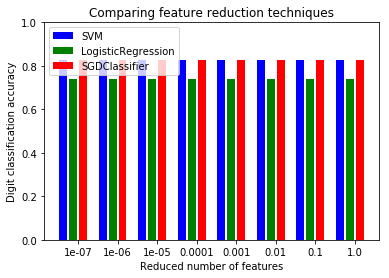

In [27]:
classifier_labels=['SVM','LogisticRegression','SGDClassifier']
mean_scores = np.array(grid_search.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape( -1, len(C_OPTIONS))
# select score for best C
mean_scores = mean_scores.max(axis=0)
bar_offsets = (np.arange(len(C_OPTIONS)) *
               (len(classifier_labels) + 1) + .5)

plt.figure()
COLORS = 'bgrcmyk'
for i, (label, class_scores) in enumerate(zip(classifier_labels, mean_scores)):
    plt.bar(bar_offsets + i, class_scores, label=label, color=COLORS[i])

plt.title("Comparing feature reduction techniques")
plt.xlabel('Reduced number of features')
plt.xticks(bar_offsets + len(classifier_labels) / 2, C_OPTIONS)
plt.ylabel('Digit classification accuracy')
plt.ylim((0, 1))
plt.legend(loc='upper left')

In [29]:
#print(grid_search.best_estimator_)
print(grid_search.best_index_)
print(grid_search.best_params_)
print(grid_search.best_score_)

44
{'clf': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), 'clf__C': 1.0, 'scale': StandardScaler(copy=True, with_mean=True, with_std=True), 'scale__with_mean': True, 'scale__with_std': True}
0.8336745138178097


# Model Advantages
Discuss the advantages of each model for each classification task. Does one type of model offer superior performance over another in terms of prediction accuracy? In terms of training time or efficiency? Explain in detail.

Looking at the accuracy of the two models there are a couple of obvious observations.

1. SVM is negatively to non-standardized observations.
2. Logistic Regression ...

# Interpret Feature Importance
Use the weights from logistic regression to interpret the importance of different features for the classification task. Explain your interpretation in detail. Why do you think some variables are more important?


# Interpret Support Vectors
Look at the chosen support vectors for the classification task. Do these provide any insight into the data? Explain. If you used stochastic gradient descent (and therefore did not explicitly solve for support vectors), try subsampling your data to train the SVC model— then analyze the support vectors from the subsampled dataset.